### `---------------Mandatory Information to fill------------`

### Group ID:
### Group Members Name with Student ID:
1. Student 1
2. Student 2
3. Student 3
4. Student 4


`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: ##Add here

# Background

In digital advertising, Click-Through Rate (CTR) is a critical metric that measures the effectiveness of an advertisement. It is calculated as the ratio of users who click on an ad to the number of users who view the ad. A higher CTR indicates more successful engagement with the audience, which can lead to increased conversions and revenue. From time-to-time advertisers experiment with various elements/targeting of an ad to optimise the ROI.

# Scenario

Imagine an innovative digital advertising agency, AdMasters Inc., that specializes in maximizing click-through rates (CTR) for their clients' advertisements. One of their clients has identified four key tunable elements in their ads: *Age*, *City*, *Gender*, and *Mobile Operating System (OS)*. These elements significantly influence user engagement and conversion rates. The client is keen to optimize their CTR while minimizing resource expenditure.

# Objective

Optimize the CTR of digital ads by employing Multi Arm Bandit algorithms. System should dynamically and efficiently allocate ad displays to maximize overall CTR.


# Dataset

The dataset for Ads contains 4 unique features/characteristics.
*   Age (Range: 25:50)
*   City (Possible Values: &#39;New York&#39;, &#39;Los Angeles&#39;, &#39;Chicago&#39;,&#39;Houston&#39;, &#39;Phoenix&#39;)
*   Gender (Possible Values: &#39;Male&#39;, &#39;Female&#39;)
*   OS: (Possible Values: &#39;iOS&#39;, &#39;Android&#39;, &#39;Other&#39;)

***Link for accessing dataset:***
https://drive.google.com/file/d/1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys/view?usp=sharing


# Environment Details

**Arms:** Each arm represents a different ad from the dataset.

**Reward Function:**
* Probability of a Male clicking on an Ad -> 0.7 (randomly generated)
* Probability of a Female clicking on an Ad -> 0.6 (randomly generated)
* Once probabilities are assigned to all the values, create a final reward (clicked or not clicked binary outcome) based on the assumed probabilities in step 1 (by combining the probabilities of each feature value present in that ad)

**Assumptions**
* Assume alpha = beta = 1 for cold start
* Explore Percentage = 10%
* Run the simulation for min 1000 iterations


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [1]:
# Constants
#!pip install gdown
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
epsilon = 0.1
# Initialize value function and policy
url = 'https://drive.google.com/uc?export=download&id=1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys'
df = pd.read_csv(url)
# Print unique values for each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print("\n")

Unique values in column 'Age':
[25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


Unique values in column 'Gender':
['Male' 'Female']


Unique values in column 'City':
['New York' 'Los Angeles' 'Chicago' 'Houston' 'Phoenix']


Unique values in column 'Phone_OS':
['iOS' 'Android' 'Other']




# Load Dataset

In [2]:
# Code for Dataset loading and print dataset statistics
#-----write your code below this line---------
# Load the dataset
url = 'https://drive.google.com/uc?export=download&id=1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys'
df = pd.read_csv(url)

# Function to calculate click probability
# def calculate_click_prob(row):
#     # Base probability based on gender
#     if row['Gender'] == 'Male':
#         if random.uniform(0, 1)>0.7:
#             prob=0.7
#         else :
#             prob=0
#     elif row['Gender'] == 'Female':
#         if random.uniform(0, 1)>0.6:
#             prob=0.6
#         else :
#             prob=0
#     # Adjust based on age
#     if 25 <= row['Age'] < 30:
#         prob += 0.05
#     elif 30 <= row['Age'] < 35:
#         prob += 0.01
#     elif 35 <= row['Age'] < 40:
#         prob += 0.005
#     elif 40 <= row['Age'] < 45:
#         prob += 0.002
#     else:
#         prob += 0.01
#     # Adjust based on city
#     city_adjustment = {
#         'New York': 0.05,
#         'Los Angeles': 0.04,
#         'Chicago': 0.03,
#         'Houston': 0.002,
#         'Phoenix': 0.001
#     }
#     prob += city_adjustment.get(row['City'], 0)
#     # Adjust based on phone OS
#     if row['Phone_OS'] == 'iOS':
#         prob += 0.01
#     elif row['Phone_OS'] == 'Android':
#         prob += 0.015
#     # Ensure the probability does not exceed 1
#     prob = min(prob, 1.0)
#     if prob>0.75:
#         return 1
#     return 0

gender_prob = {'Male': 0.7, 'Female': 0.6}
age_prob = {range(25, 35): 0.8, range(35, 50): 0.7}
city_prob = {'New York': 0.8, 'Los Angeles': 0.7, 'Chicago': 0.75, 'Houston': 0.9, 'Phoenix': 0.8}
mobile_os_prob = {'iOS': 0.85, 'Android': 0.95, 'Other': 0.5}

# Define a function to calculate the total probability
def calculate_click_prob(row):
    gender_probability = gender_prob.get(row['Gender'], 0)
    age_probability = next((prob for age_range, prob in age_prob.items() if row['Age'] in age_range), 0)
    city_probability = city_prob.get(row['City'], 0)
    mobile_os_probability = mobile_os_prob.get(row['Phone_OS'], 0)
    
    # Print to debug
    #print(f"Row: {row}")
    #print(f"Probabilities: {gender_probability=}, {age_probability=}, {city_probability=}, {mobile_os_probability=}")
    
    # Example total probability calculation (product of individual probabilities)
    total_probability = gender_probability * age_probability * city_probability * mobile_os_probability
    return total_probability
    # #print(total_probability)
    # if total_probability>0.13:
    #     return 1
    # else :
    #     return 0

# Apply the function to each row
#df['click_probability'] = df.apply(calculate_click_prob, axis=1)


 
# Apply the function to calculate click probabilities
df['click_prob'] = df.apply(calculate_click_prob, axis=1)
print(df)
 
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())
 
# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())
 
# Display first few rows of the dataset
print("\nFirst few rows:")
print(df.head())

     Age  Gender         City Phone_OS  click_prob
0     25    Male     New York      iOS      0.3808
1     25    Male     New York  Android      0.4256
2     25    Male     New York    Other      0.2240
3     25    Male  Los Angeles      iOS      0.3332
4     25    Male  Los Angeles  Android      0.3724
..   ...     ...          ...      ...         ...
775   50  Female      Houston  Android      0.0000
776   50  Female      Houston    Other      0.0000
777   50  Female      Phoenix      iOS      0.0000
778   50  Female      Phoenix  Android      0.0000
779   50  Female      Phoenix    Other      0.0000

[780 rows x 5 columns]
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         780 non-null    int64  
 1   Gender      780 non-null    object 
 2   City        780 non-null    object 
 3   Phone_OS    780 non-null    object 


# Design a CTR Environment (1M)

In [3]:
# Code for Dataset loading and print dataset statistics along with reward function
#-----write your code below this line---------
class CTREnvironment:
    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.dataset = self.load_dataset()
        
    def load_dataset(self):
        try:
            dataset = pd.read_csv(self.dataset_path)
            return dataset
        except FileNotFoundError:
            print(f"Error: File '{self.dataset_path}' not found.")
            return None

    def print_dataset_statistics(self):
        if self.dataset is not None:
            print("Dataset Statistics:")
            print(f"Number of rows: {len(self.dataset)}")
            print(f"Columns: {', '.join(self.dataset.columns)}")
            print(f"Sample data:\n{self.dataset.head()}\n")
        else:
            print("No dataset loaded.")   
    
    # def simulate_click_through_rate(self, ad_index):
    #     # Simulate click-through rate based on assumed probabilities
    #     click_probabilities = {
    #         'Male': 0.7,   # Probability of a Male clicking on an ad
    #         'Female': 0.6  # Probability of a Female clicking on an ad
    #     }
        
    #     demographic = self.dataset.iloc[ad_index]['Gender']

    #     # Simulate click (reward = 1) or no click (reward = 0) based on probability
    #     if np.random.random() < click_probabilities[demographic]:
    #         return 1
    #     else:
    #         return 0

    def simulate_click_through_rate(self, ad_index):
        # Simulate click (reward = 1) or no click (reward = 0) based on probability
        if np.random.random() < calculate_click_prob(self.dataset.iloc[ad_index]):
            return 1
        else:
            return 0

    # def simulate_click_through_rate2(self, ad_index):
    #     # Simulate click (reward = 1) or no click (reward = 0) based on probability
    #     return calculate_click_prob(self.dataset.iloc[ad_index])

# Base class for all agents
class BaseAgent:
    def __init__(self, env, epsilon=0.1):
        self.env = env
        self.epsilon = epsilon
        self.ad_rewards = np.zeros(len(self.env.dataset))
        self.ad_counts = np.zeros(len(self.env.dataset))

# Using Random Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [4]:
#  run the environment with an agent that is guided by a random policy
#-----write your code below this line---------
# Agent that follows a random policy
class RandomPolicyAgent(BaseAgent):
    def run(self, iterations):
        total_rewards = 0
        ctr_history = []
        for i in range(iterations):
            ad_index = random.randint(0, len(self.env.dataset))
            reward = self.env.simulate_click_through_rate(ad_index)
            self.ad_rewards[ad_index] += reward
            self.ad_counts[ad_index] += 1
            total_rewards += reward
            # Calculate current average CTR for ads that have been shown at least once
            shown_ads = self.ad_counts > 0
            if np.any(shown_ads):
                current_ctr = np.mean(self.ad_rewards[shown_ads] / self.ad_counts[shown_ads])
            else:
                current_ctr = 0
            ctr_history.append(current_ctr)
        #print(ctr_history)
        return ctr_history
# dataset_path = 'https://drive.google.com/uc?export=download&id=1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys'
# env = CTREnvironment(dataset_path)
# iterations = 1000

# # Instantiate agents
# random_agent = RandomPolicyAgent(env)
# random_ctr_history = random_agent.run(iterations)
# #print(random_ctr_history)

# Using Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [5]:
#  run the environment with an agent that is guided by a greedy policy
#-----write your code below this line---------
# Agent that follows a greedy policy
class GreedyPolicyAgent(BaseAgent):
    def select_ad(self):
        tried_ads_indices = np.where(self.ad_counts > 0)[0]
        #print(tried_ads_indices)
        average_rewards = np.zeros_like(self.ad_counts)
        average_rewards[tried_ads_indices] = self.ad_rewards[tried_ads_indices] / self.ad_counts[tried_ads_indices]
        return np.argmax(average_rewards)
    
    def run(self, iterations):
        ctr_history = []
        total_rewards = 0
        for m in range(1):
            for ad_index in range(780):
                reward = self.env.simulate_click_through_rate(ad_index)
                self.ad_rewards[ad_index] += reward
                self.ad_counts[ad_index] += 1
        
        for _ in range(iterations):
            ad_index = self.select_ad()
            reward = self.env.simulate_click_through_rate(ad_index)
            self.ad_rewards[ad_index] += reward
            self.ad_counts[ad_index] += 1
            total_rewards += reward
            # Calculate current average CTR, handling division by zero
            valid_counts = self.ad_counts > 0
            current_ctr = np.mean(np.where(valid_counts, self.ad_rewards / self.ad_counts, 0))
            ctr_history.append(current_ctr)
        return ctr_history

# Using Epsilon-Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [6]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
#-----write your code below this line---------
# Agent that follows an epsilon-greedy policy
class EpsilonGreedyAgent(BaseAgent):
    def __init__(self, env, epsilon=0.1):
        super().__init__(env)
        self.epsilon = epsilon

    def select_ad(self):
        # Select a random ad with probability epsilon, otherwise the best ad
        if np.random.random() < self.epsilon:
            return np.random.randint(0, len(self.env.dataset))
        else:
            tried_ads_indices = np.where(self.ad_counts > 0)[0]
            #print(tried_ads_indices)
            average_rewards = np.zeros_like(self.ad_counts)
            average_rewards[tried_ads_indices] = self.ad_rewards[tried_ads_indices] / self.ad_counts[tried_ads_indices]
            return np.argmax(average_rewards)
    
    def run(self, iterations):
        ctr_history = []
        total_rewards = 0
        
        for m in range(1):
            for ad_index in range(780):
                reward = self.env.simulate_click_through_rate(ad_index)
                self.ad_rewards[ad_index] += reward
                self.ad_counts[ad_index] += 1
        
        for _ in range(iterations):
            ad_index = self.select_ad()
            reward = self.env.simulate_click_through_rate(ad_index)
            self.ad_rewards[ad_index] += reward
            self.ad_counts[ad_index] += 1
            total_rewards += reward
            
            # Calculate current average CTR, handling division by zero
            valid_counts = self.ad_counts > 0
            current_ctr = np.mean(np.where(valid_counts, self.ad_rewards / self.ad_counts, 0))
            ctr_history.append(current_ctr)
        return ctr_history

# Using UCB (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [7]:
#  run the environment with an agent that is guided by a UCB
#-----write your code below this line---------
# Agent that follows the UCB policy
class UCBAgent(BaseAgent):
    def __init__(self, env, epsilon=0.1):  # epsilon not used, but keep signature consistent
        super().__init__(env)
        self.total_counts = 0
    
    def select_ad(self):
        # Select the ad with the highest upper confidence bound
        if self.total_counts < len(self.env.dataset):
            # Ensure each ad is selected at least once
            return self.total_counts
        else:
            ucb_values = self.ad_rewards / self.ad_counts + np.sqrt(2 * np.log(self.total_counts) / self.ad_counts)
            return np.argmax(ucb_values)
    
    def run(self, iterations):
        ctr_history = []
        total_rewards = 0
        for m in range(1):
            for ad_index in range(780):
                reward = self.env.simulate_click_through_rate(ad_index)
                self.ad_rewards[ad_index] += reward
                self.ad_counts[ad_index] += 1
        
        for _ in range(iterations):
            ad_index = self.select_ad()
            reward = self.env.simulate_click_through_rate(ad_index)
            self.ad_rewards[ad_index] += reward
            self.ad_counts[ad_index] += 1
            self.total_counts += 1
            total_rewards += reward
            
            # Calculate current average CTR, handling division by zero
            valid_counts = self.ad_counts > 0
            current_ctr = np.mean(np.where(valid_counts, self.ad_rewards / self.ad_counts, 0))
            ctr_history.append(current_ctr)
        
        return ctr_history

# Plot CTR distribution for all the appraoches as a spearate graph (0.5M)

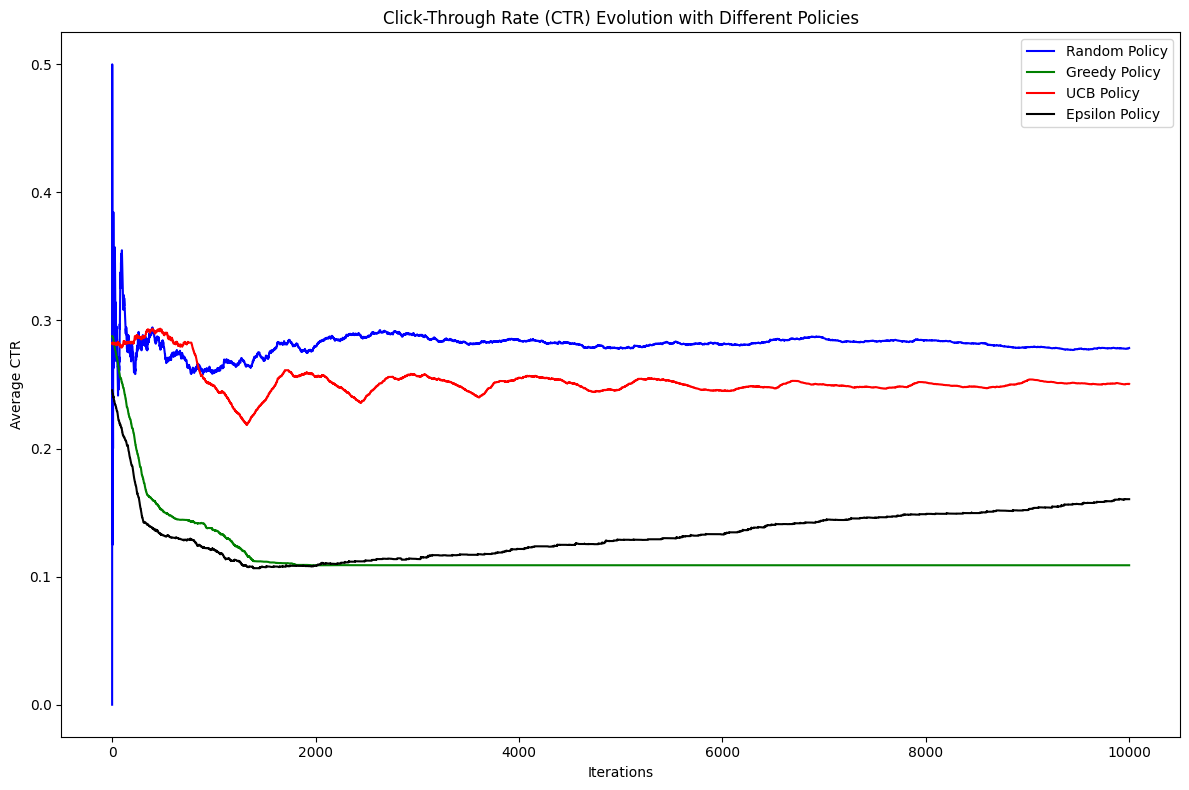

In [8]:
#-----write your code below this line---------
# Number of iterations for each agent
# Number of iterations for each agent

# Example usage and plotting
dataset_path = 'https://drive.google.com/uc?export=download&id=1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys'
env = CTREnvironment(dataset_path)
iterations = 10000

# Instantiate agents
random_agent = RandomPolicyAgent(env)
greedy_agent = GreedyPolicyAgent(env)
ucb_agent = UCBAgent(env)
epsilon_agent = EpsilonGreedyAgent(env)

# Run agents and collect CTR histories
random_ctr_history = random_agent.run(iterations)
greedy_ctr_history = greedy_agent.run(iterations)
ucb_ctr_history = ucb_agent.run(iterations)
epsilon_ctr_history = epsilon_agent.run(iterations)

# Plot CTR distributions as line graphs
plt.figure(figsize=(12, 8))

plt.plot(random_ctr_history, label='Random Policy', color='blue')
plt.plot(greedy_ctr_history, label='Greedy Policy', color='green')
plt.plot(ucb_ctr_history, label='UCB Policy', color='red')
plt.plot(epsilon_ctr_history, label='Epsilon Policy', color='black')

plt.title('Click-Through Rate (CTR) Evolution with Different Policies')
plt.xlabel('Iterations')
plt.ylabel('Average CTR')
plt.legend()

plt.tight_layout()
plt.show()

# Changing Exploration Percentage (1M)
* How does changing the exploration percentage (EXPLORE_PERCENTAGE) affect the performance of the algorithm? Test with different values (e.g. 0.15 and 0.2) and discuss the results.

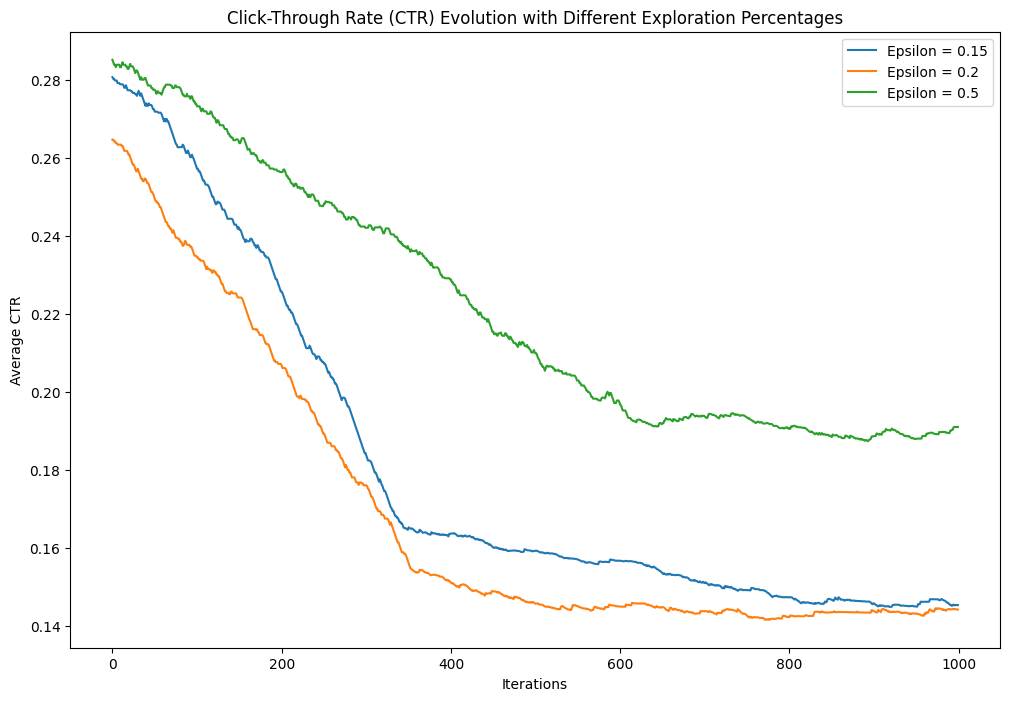

In [9]:
#Implement with any MAB algorithm
#Try with different EXPLORE_PERCENTAGE
#Different value of alpha
# Experiment with different explore percentages and alpha values
# Number of iterations for each agent
iterations = 1000

# Run Epsilon-Greedy Agent with different exploration percentages
epsilons = [0.15, 0.2, 0.5]
epsilon_ctr_histories = {}

for epsilon in epsilons:
    agent = EpsilonGreedyAgent(env, epsilon)
    epsilon_ctr_histories[epsilon] = agent.run(iterations)

# Plot CTR distributions as line graphs
plt.figure(figsize=(12, 8))

for epsilon, ctr_history in epsilon_ctr_histories.items():
    plt.plot(ctr_history, label=f'Epsilon = {epsilon}')

plt.title('Click-Through Rate (CTR) Evolution with Different Exploration Percentages')
plt.xlabel('Iterations')
plt.ylabel('Average CTR')
plt.legend()

# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for maximizing the CTR using random, greedy, epsilon-greedy and UCB.

`----write below this line------`

In the realm of digital advertising, maximizing Click-Through Rate (CTR) is crucial for optimizing campaign effectiveness. Various Multi-Armed Bandit (MAB) algorithms—random, greedy, epsilon-greedy, and Upper Confidence Bound (UCB)—offer distinct approaches to balancing exploration (discovering new high-CTR options) and exploitation (leveraging known high-CTR options).

Random Approach: This baseline method explores options randomly without considering past performance. While simple to implement, its lack of learning from historical data limits its effectiveness in maximizing CTR over time. Random exploration is unpredictable and inefficient compared to more sophisticated algorithms.

Greedy Approach: A greedy strategy exploits the current best-known option in each decision, maximizing short-term gains. However, it tends to under-explore, potentially missing better long-term options. This approach is straightforward but may lead to suboptimal results when early choices do not represent the true optimal.

Epsilon-Greedy Approach: Combining exploration and exploitation, epsilon-greedy allocates most actions to the best-known option, but with a probability ε, it explores randomly. This balances steady exploitation with occasional exploration, making it robust for CTR maximization in dynamic environments. Tuning ε is crucial; higher values encourage exploration but may reduce overall efficiency.

UCB Approach: UCB algorithms calculate each option's Upper Confidence Bound, balancing exploration with the confidence in their rewards. This method efficiently balances between exploration and exploitation by prioritizing uncertain or underexplored options. It adapts well to changing environments and offers a structured way to maximize long-term rewards.

Conclusion: For maximizing CTR in digital advertising, the choice of MAB algorithm depends on the balance desired between exploration and exploitation. Random exploration is rudimentary but necessary as a baseline. Greedy algorithms are straightforward but risk local optima. Epsilon-greedy methods strike a balance, making them versatile for various applications. UCB algorithms excel in dynamic environments, offering efficient exploration while leveraging high-confidence options.
In practice, a hybrid approach—starting with epsilon-greedy to explore broadly and transitioning to UCB once high-confidence options are identified—can optimize CTR effectively. Continuous evaluation and adaptation of these strategies based on real-time data and campaign goals are key to achieving sustained performance improvements in digital advertising campaigns.